In [4]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [48]:
mnist=tf.keras.datasets.mnist

In [49]:
(x_train_full,y_train_full),(x_test,y_test)=mnist.load_data()

In [7]:
x_valid,x_train=x_train_full[:5000]/255.,x_train_full[5000:]/255.
y_valid,y_train=y_train_full[:5000],y_train_full[5000:]
x_test=x_test/255.

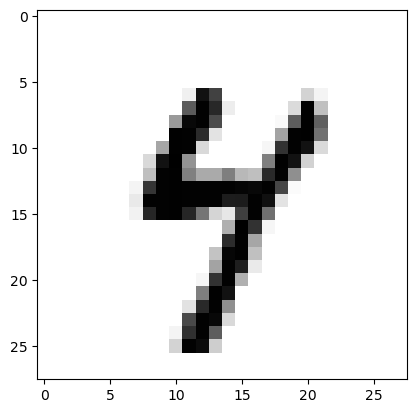

In [51]:
plt.imshow(x_train[33],cmap='binary')

In [9]:
import seaborn as sns

<AxesSubplot: >

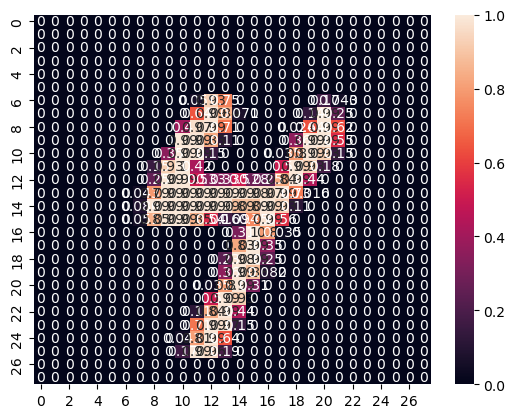

In [52]:
sns.heatmap(x_train[33],annot=True)

In [11]:
Layers=[
    tf.keras.layers.Flatten(input_shape=(28,28),name='inputlayer'),
    tf.keras.layers.Dense(units=300,activation='relu',name='hiddenlayer1'),
    tf.keras.layers.Dense(units=100,activation='relu',name='hiddenlayer2'),
    tf.keras.layers.Dense(units=10,activation='softmax',name='outputlayer')
]
model=tf.keras.models.Sequential(Layers)

In [53]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputlayer (Flatten)        (None, 784)               0         
                                                                 
 hiddenlayer1 (Dense)        (None, 300)               235500    
                                                                 
 hiddenlayer2 (Dense)        (None, 100)               30100     
                                                                 
 outputlayer (Dense)         (None, 10)                1010      
                                                                 
Total params: 266610 (1.02 MB)
Trainable params: 266610 (1.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
lr=model.layers[1]

In [14]:
weights,bias=lr.get_weights()

In [15]:
weights.shape

(784, 300)

In [16]:
bias.shape

(300,)

In [17]:
loss_fun='sparse_categorical_crossentropy'
optimizer='SGD'
metrics=['accuracy']

model.compile(optimizer=optimizer,metrics=metrics,loss=loss_fun)


In [18]:
## callback functions

early_stopp=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=10,restore_best_weights=True)

In [19]:
import os
import time

In [22]:
log_d='logs/fit'
os.makedirs(log_d,exist_ok=True) ## it will make folder at log_d location
fileName = time.strftime("log_%Y_%m_%d_%H_%M_%S") # name of file which will save there
log_dir=os.path.join(log_d,fileName)
tesnor_brd=tf.keras.callbacks.TensorBoard(log_dir=log_dir)

In [23]:
chk_pnt="check_point.h5"
chck_point=tf.keras.callbacks.ModelCheckpoint(filepath=chk_pnt,save_best_only=True)

In [25]:
valid_set=(x_valid,y_valid)
EPOCHS=30
trained_model=model.fit(x_train,y_train,epochs=EPOCHS,validation_data=valid_set,batch_size=32,callbacks=[chck_point,tesnor_brd,early_stopp])

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1903 - accuracy: 0.9449 - val_loss: 0.1697 - val_accuracy: 0.9566
Epoch 2/30
  55/1719 [..............................] - ETA: 4s - loss: 0.1741 - accuracy: 0.9528

/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1719/1719 [==============================] - 5s 3ms/step - loss: 0.1684 - accuracy: 0.9523 - val_loss: 0.1524 - val_accuracy: 0.9592
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1509 - accuracy: 0.9567 - val_loss: 0.1405 - val_accuracy: 0.9644
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1363 - accuracy: 0.9615 - val_loss: 0.1329 - val_accuracy: 0.9646
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.1240 - accuracy: 0.9653 - val_loss: 0.1201 - val_accuracy: 0.9670
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1137 - accuracy: 0.9679 - val_loss: 0.1137 - val_accuracy: 0.9696
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.1044 - accuracy: 0.9705 - val_loss: 0.1088 - val_accuracy: 0.9708
Epoch 8/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0968 - accuracy: 0.9725 - val_loss: 0.1063 - val_accuracy: 0.9704
Epo

In [26]:
## evaluate
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0660 - accuracy: 0.9798


[0.06597412377595901, 0.9797999858856201]

In [27]:
trained_model.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

<AxesSubplot: >

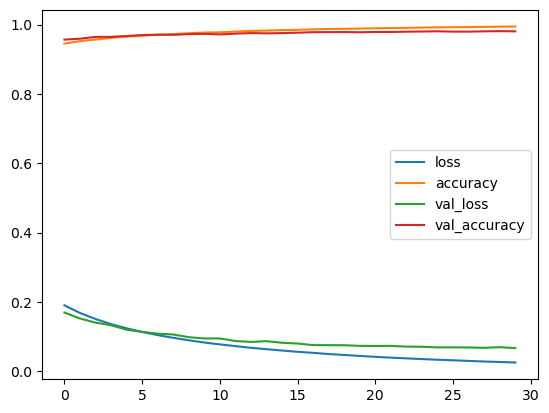

In [28]:
pd.DataFrame(trained_model.history).plot()

In [32]:
## loading checkpoint model
## we have saved the best model there 
check_point_model=tf.keras.models.load_model(chk_pnt)

In [33]:
his=check_point_model.fit(x_train,y_train,epochs=EPOCHS,batch_size=32,validation_data=valid_set,callbacks=[chck_point,tesnor_brd,early_stopp])

Epoch 1/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0120 - accuracy: 0.9986 - val_loss: 0.0660 - val_accuracy: 0.9810
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0115 - accuracy: 0.9988 - val_loss: 0.0654 - val_accuracy: 0.9816
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0109 - accuracy: 0.9988 - val_loss: 0.0662 - val_accuracy: 0.9812
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0105 - accuracy: 0.9990 - val_loss: 0.0667 - val_accuracy: 0.9812
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0100 - accuracy: 0.9992 - val_loss: 0.0666 - val_accuracy: 0.9814
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0096 - accuracy: 0.9993 - val_loss: 0.0672 - val_accuracy: 0.9800
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0092 - accuracy: 0.9993 - val_loss: 0.0689 - val_accuracy:

<AxesSubplot: >

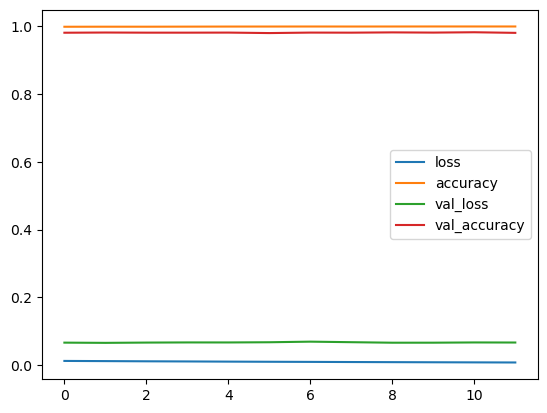

In [37]:
pd.DataFrame(his.history).plot()

In [38]:
## we can see above that we got the best weights with which the accuracy of the model is 
## already high and loss is very low and there is no any deviation because they are already best weights

## save model

In [41]:
model_dir='my_ann_model'  ## name of directory
os.makedirs(model_dir,exist_ok=True) ## making directory if exists then it will be considered
filename=time.strftime('%Y_%m_%d_%H_%M_%S.h5') ## the file name with which model will be saved
model_path=os.path.join(model_dir,filename) ## joining the directory and filename

In [42]:
tf.keras.models.save_model(model,model_path)

/tmp/ipykernel_102/2722704439.py:1: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  tf.keras.models.save_model(model,model_path)


In [44]:
## lets predict the value using our model
my_saved_model=tf.keras.models.load_model('my_ann_model/2023_07_08_09_53_45.h5')

In [62]:
x_new=x_test[:3]

In [63]:
y_actual=y_test[:3]

In [64]:
y_pred=my_saved_model.predict(x_new)

1/1 [==============================] - 0s 74ms/step


In [65]:
y_pred.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [66]:
import numpy as np

In [70]:
np.argmax(y_pred,axis=-1)

array([7, 2, 1])

In [68]:
y_actual

array([7, 2, 1], dtype=uint8)